In [1]:
from graph import compiled_graph, agentic_email_triage

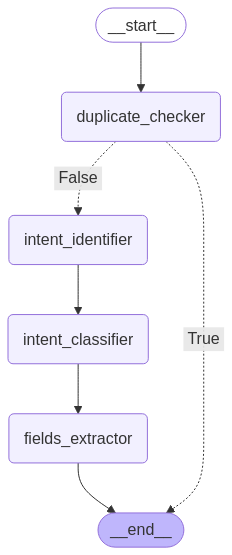

In [2]:
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

display(
    Image(
        compiled_graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [3]:
import os
os.environ["GROQ_API_KEY"] = "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"

In [4]:
def get_text_from_file(file_path):
    try:
        with open(file_path, "r", encoding="utf-8") as file:
            return file.read()
    except FileNotFoundError:
        return "Error: File not found."
    except Exception as e:
        return f"Error: {str(e)}"

In [5]:
content = get_text_from_file("data/new.txt")
content

'Subject: Request for Loan Adjustment and Payment Schedule Update\n\nFrom: John Doe john.doe@email.com\nTo: Loan Services Department loanservices@wellsfargo.com\nCC: Jane Smith jane.smith@email.com\nDate: March 25, 2025\nTime: 10:30 AM (EST)\n\nDear Loan Services Team,\n\nI hope this email finds you well. I am reaching out to request a loan adjustment and an updated payment schedule for my existing loan. Below are the details:\n\nLoan Details:\n\nBorrower Name: John Doe\nLoan Account Number: 123456789\nLoan Type: Fixed-Rate Mortgage\nOriginal Loan Amount: $350,000\nCurrent Outstanding Balance: $275,000\nMaturity Date: December 15, 2040\nRequest Details:\n\nLoan Adjustment: I would like to explore options for adjusting the loan terms due to recent financial changes. Specifically, I am interested in reducing the monthly installment or extending the loan tenure.\nUpdated Payment Schedule: Please provide me with an updated amortization schedule reflecting any potential adjustments.\nFee In

In [6]:
json_result = agentic_email_triage(content)

['deal_name', 'adjustment_amount', 'adjustment_reason', 'effective_date', 'deal_name', 'old_commitment', 'new_commitment', 'effective_date', 'change_reason']
["doesn't exist", "doesn't exist", 'recent financial changes', "doesn't exist", "doesn't exist", "doesn't exist", "doesn't exist", "doesn't exist", 'recent financial changes']
{'email_content': 'Subject: Request for Loan Adjustment and Payment Schedule Update\n\nFrom: John Doe john.doe@email.com\nTo: Loan Services Department loanservices@wellsfargo.com\nCC: Jane Smith jane.smith@email.com\nDate: March 25, 2025\nTime: 10:30 AM (EST)\n\nDear Loan Services Team,\n\nI hope this email finds you well. I am reaching out to request a loan adjustment and an updated payment schedule for my existing loan. Below are the details:\n\nLoan Details:\n\nBorrower Name: John Doe\nLoan Account Number: 123456789\nLoan Type: Fixed-Rate Mortgage\nOriginal Loan Amount: $350,000\nCurrent Outstanding Balance: $275,000\nMaturity Date: December 15, 2040\nReq

In [7]:
json_result

{'email_intent': 'The borrower, John Doe, is requesting a loan adjustment and updated payment schedule for his existing fixed-rate mortgage loan (Account Number: 123456789) due to recent financial changes, specifically seeking to reduce his monthly installment or extend the loan tenure, and inquires about associated processing fees and required documentation.',
 'is_duplicate': False,
 'dup_reason': 'Initial request email starting the thread',
 'classification_result': ClassificationResult(result=[RequestType(name='Adjustment', sub_types=[]), RequestType(name='Commitment Change', sub_types=[SubRequestType(name='Decrease')])], confidence_score=90, reason="The email intent explicitly mentions a loan adjustment and updated payment schedule, which aligns with the 'Adjustment' and 'Commitment Change' request types."),
 'extracted_fields': {'deal_name': "doesn't exist",
  'adjustment_amount': "doesn't exist",
  'adjustment_reason': 'recent financial changes',
  'effective_date': "doesn't exi